In [0]:
#Importing Libraries
import keras
from keras.datasets import mnist 
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
#loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of test examples : 10000 and each image is of shape (28, 28)


In [0]:
#converting the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of test examples : 10000 and each image is of shape (784)


In [0]:
#Normalization
X_train = X_train/255
X_test = X_test/255

In [0]:
from keras.utils import np_utils 
#converting y into a 10 dimensional vector
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)


In [0]:

from keras.models import Sequential 
from keras.layers import Dense, Activation 
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

#### Model 1

###### with dropout and batch normalization layers

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model1= Sequential()
model1.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model1.add(Dropout(0.5))
model1.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model1.add(BatchNormalization())
model1.add(Dense(output_dim, activation='softmax'))
model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 364)               285740    
_________________________________________________________________
dropout_1 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 182)               66430     
_________________________________________________________________
batch_normalization_1 (Batch (None, 182)               728       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1830      
Total params: 354,728
Trainable params: 354,364
Non-trainable params: 364
_____________

In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1_history = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.3518 - acc: 0.8933 - val_loss: 0.1284 - val_acc: 0.9613
Epoch 2/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.1670 - acc: 0.9490 - val_loss: 0.0926 - val_acc: 0.9701
Epoch 3/20
60000/60000 [==============================] - 4s 58us/step - loss: 0.1337 - acc: 0.9587 - val_loss: 0.0807 - val_acc: 0.9734
Epoch 4/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.1115 - acc: 0.9646 - val_loss: 0.0814 - val_acc: 0.9754
Epoch 5/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0981 - acc: 0.9686 - val_loss: 0.0658 - val_acc: 0.9783
Epoch 6/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0889 - acc: 0.9716 - val_loss: 0.0647 - val_acc: 0.9784
Epoch 7/20
60000/60000 [==============================] - 3s 58us/step - loss: 

Test score: 0.05327474083028137
Test accuracy: 0.984


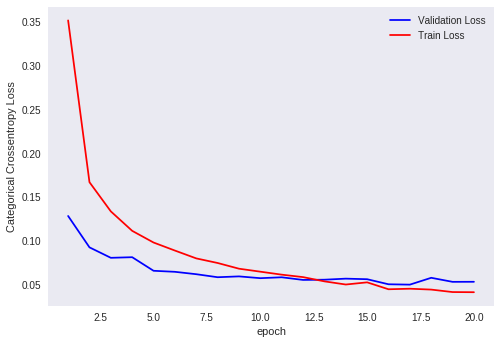

In [0]:
import numpy as np
import matplotlib.pyplot as plt
score = model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model1_history.history['val_loss']
ty = model1_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()


###### with  smaller dropout  rate 

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model1= Sequential()
model1.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model1.add(Dropout(0.1))
model1.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model1.add(BatchNormalization())
model1.add(Dense(output_dim, activation='softmax'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 364)               285740    
_________________________________________________________________
dropout_2 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 182)               66430     
_________________________________________________________________
batch_normalization_2 (Batch (None, 182)               728       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1830      
Total params: 354,728
Trainable params: 354,364
Non-trainable params: 364
_________________________________________________________________


In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1_history = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2262 - acc: 0.9311 - val_loss: 0.1145 - val_acc: 0.9640
Epoch 2/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0939 - acc: 0.9712 - val_loss: 0.0901 - val_acc: 0.9710
Epoch 3/20
60000/60000 [==============================] - 4s 58us/step - loss: 0.0635 - acc: 0.9805 - val_loss: 0.0809 - val_acc: 0.9757
Epoch 4/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.0488 - acc: 0.9841 - val_loss: 0.0794 - val_acc: 0.9761
Epoch 5/20
60000/60000 [==============================] - 4s 58us/step - loss: 0.0403 - acc: 0.9871 - val_loss: 0.0645 - val_acc: 0.9799
Epoch 6/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0323 - acc: 0.9898 - val_loss: 0.0675 - val_acc: 0.9802
Epoch 7/20
60000/60000 [==============================] - 4s 58us/step - loss: 0.0266 - acc: 0.9908 - val_loss: 0.0673 - val_acc

Test score: 0.07057885068536343
Test accuracy: 0.9846


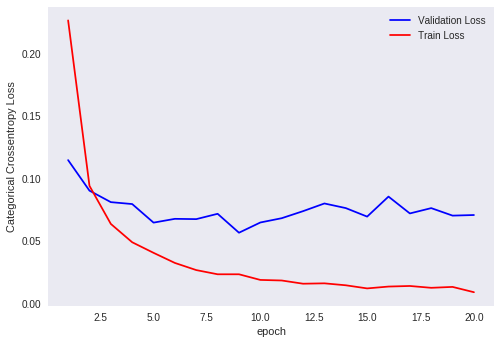

In [0]:
import numpy as np
import matplotlib.pyplot as plt
score = model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model1_history.history['val_loss']
ty = model1_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()


###### With larger drop out rate 

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model1= Sequential()
model1.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model1.add(Dropout(0.9))
model1.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model1.add(BatchNormalization())
model1.add(Dense(output_dim, activation='softmax'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 364)               285740    
_________________________________________________________________
dropout_3 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 182)               66430     
_________________________________________________________________
batch_normalization_3 (Batch (None, 182)               728       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1830      
Total params: 354,728
Trainable params: 354,364
Non-trainable params: 364
_________________________________________________________________


In [0]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1_history = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.9095 - acc: 0.7009 - val_loss: 0.2793 - val_acc: 0.9168
Epoch 2/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.5515 - acc: 0.8273 - val_loss: 0.2330 - val_acc: 0.9278
Epoch 3/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.4798 - acc: 0.8519 - val_loss: 0.2015 - val_acc: 0.9391
Epoch 4/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.4402 - acc: 0.8624 - val_loss: 0.1923 - val_acc: 0.9407
Epoch 5/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.4115 - acc: 0.8718 - val_loss: 0.1733 - val_acc: 0.9459
Epoch 6/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.3960 - acc: 0.8778 - val_loss: 0.1690 - val_acc: 0.9490
Epoch 7/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.3747 - acc: 0.8857 - val_loss: 0.1615 - val_acc

Test score: 0.15185550288558006
Test accuracy: 0.9595


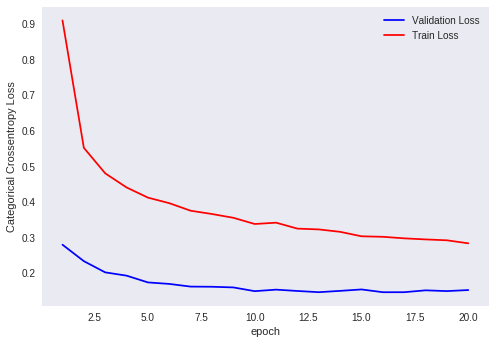

In [0]:
import numpy as np
import matplotlib.pyplot as plt
score = model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model1_history.history['val_loss']
ty = model1_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()


###### with out Drop out layer 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_11 (Dense)             (None, 182)               66430     
_________________________________________________________________
batch_normalization_4 (Batch (None, 182)               728       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1830      
Total params: 354,728
Trainable params: 354,364
Non-trainable params: 364
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.1998 - acc: 0.9400 - val_loss: 0.1120 - val_acc: 0.9645
Epoch 2/20
60000/60000 [==============================] - 3s 58us/step - loss: 

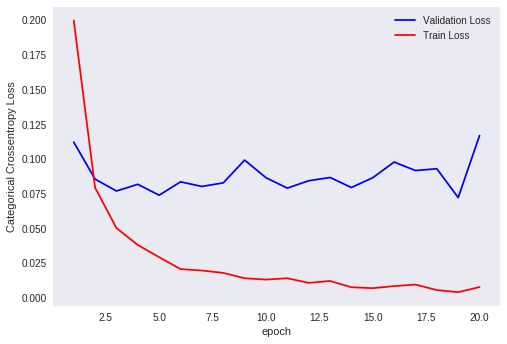

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model1= Sequential()
model1.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model1.add(Dropout(0.5))
model1.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model1.add(BatchNormalization())
model1.add(Dense(output_dim, activation='softmax'))
model1.summary()
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1_history = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model1_history.history['val_loss']
ty = model1_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()



###### with out batch normalization layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 364)               285740    
_________________________________________________________________
dropout_4 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 182)               66430     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1830      
Total params: 354,000
Trainable params: 354,000
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.3442 - acc: 0.8959 - val_loss: 0.1351 - val_acc: 0.9582
Epoch 2/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.

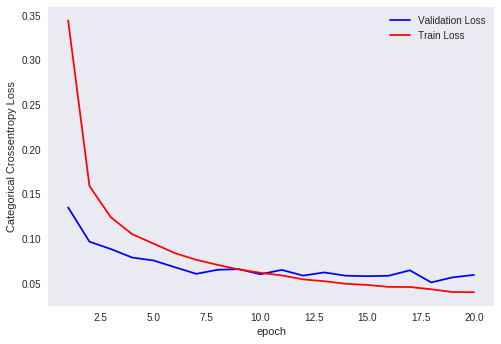

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model1= Sequential()
model1.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model1.add(Dropout(0.5))
model1.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model1.add(BatchNormalization())
model1.add(Dense(output_dim, activation='softmax'))
model1.summary()
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1_history = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model1_history.history['val_loss']
ty = model1_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()



###### with samller dropout rate 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 364)               285740    
_________________________________________________________________
dropout_5 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 182)               66430     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1830      
Total params: 354,000
Trainable params: 354,000
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2590 - acc: 0.9233 - val_loss: 0.1115 - val_acc: 0.9673
Epoch 2/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.

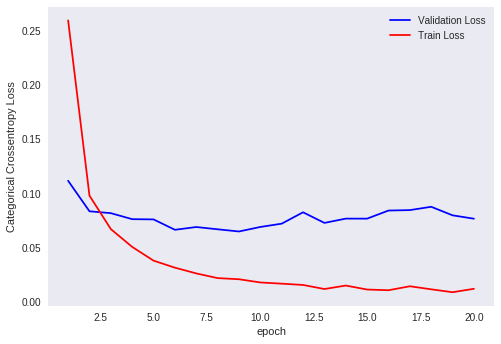

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model1= Sequential()
model1.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model1.add(Dropout(0.1))
model1.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model1.add(BatchNormalization())
model1.add(Dense(output_dim, activation='softmax'))
model1.summary()
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1_history = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model1_history.history['val_loss']
ty = model1_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()



###### with larger dropout layer 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 364)               285740    
_________________________________________________________________
dropout_6 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 182)               66430     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1830      
Total params: 354,000
Trainable params: 354,000
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.9079 - acc: 0.6973 - val_loss: 0.2892 - val_acc: 0.9182
Epoch 2/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.

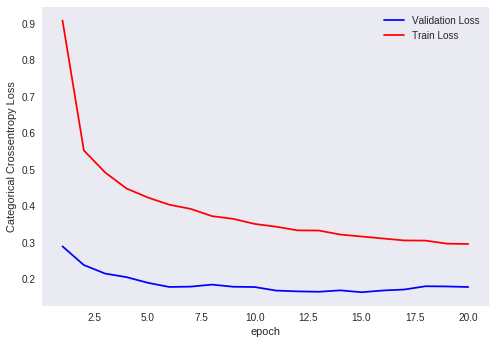

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model1= Sequential()
model1.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model1.add(Dropout(0.9))
model1.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model1.add(BatchNormalization())
model1.add(Dense(output_dim, activation='softmax'))
model1.summary()
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1_history = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model1_history.history['val_loss']
ty = model1_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()



###### With out batch normalization and drop out layers 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_23 (Dense)             (None, 182)               66430     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1830      
Total params: 354,000
Trainable params: 354,000
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2392 - acc: 0.9291 - val_loss: 0.1050 - val_acc: 0.9684
Epoch 2/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0875 - acc: 0.9732 - val_loss: 0.0894 - val_acc: 0.9729
Epoch 3/20
60000/60000 [==============================] - 3s 46us/step - los

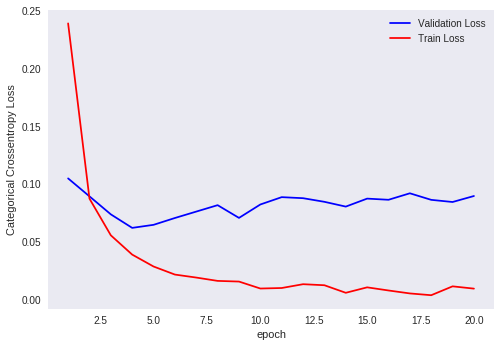

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model1= Sequential()
model1.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model1.add(Dropout(0.5))
model1.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model1.add(BatchNormalization())
model1.add(Dense(output_dim, activation='softmax'))
model1.summary()
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1_history = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model1_history.history['val_loss']
ty = model1_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()



##### Model 2

###### Model 2 with batch normalization and drop out layers

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model2= Sequential()
model2.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model2.add(Dropout(0.5))
model2.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model2.add(BatchNormalization())
model2.add(Dense(91,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model2.add(Dense(output_dim, activation='softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 364)               285740    
_________________________________________________________________
dropout_7 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 182)               66430     
_________________________________________________________________
batch_normalization_5 (Batch (None, 182)               728       
_________________________________________________________________
dense_27 (Dense)             (None, 91)                16653     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                920       
Total params: 370,471
Trainable params: 370,107
Non-trainable params: 364
_________________________________________________________________


In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2_history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.3826 - acc: 0.8785 - val_loss: 0.1251 - val_acc: 0.9614
Epoch 2/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1724 - acc: 0.9473 - val_loss: 0.0981 - val_acc: 0.9687
Epoch 3/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1383 - acc: 0.9577 - val_loss: 0.0847 - val_acc: 0.9728
Epoch 4/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1151 - acc: 0.9632 - val_loss: 0.0732 - val_acc: 0.9762
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1029 - acc: 0.9669 - val_loss: 0.0742 - val_acc: 0.9762
Epoch 6/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0917 - acc: 0.9710 - val_loss: 0.0686 - val_acc: 0.9782
Epoch 7/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0852 - acc: 0.9725 - val_loss: 0.0641 - val_acc

Test score: 0.05674564254199213
Test accuracy: 0.9834


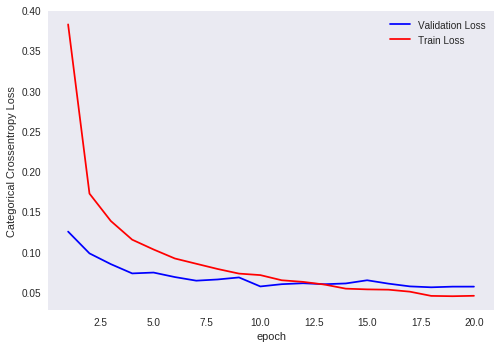

In [0]:
score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model2_history.history['val_loss']
ty = model2_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

###### with samlller drop out rate 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 364)               285740    
_________________________________________________________________
dropout_8 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 182)               66430     
_________________________________________________________________
batch_normalization_6 (Batch (None, 182)               728       
_________________________________________________________________
dense_31 (Dense)             (None, 91)                16653     
_________________________________________________________________
dense_32 (Dense)             (None, 10)                920       
Total params: 370,471
Trainable params: 370,107
Non-trainable params: 364
_________________________________________________________________
Tr

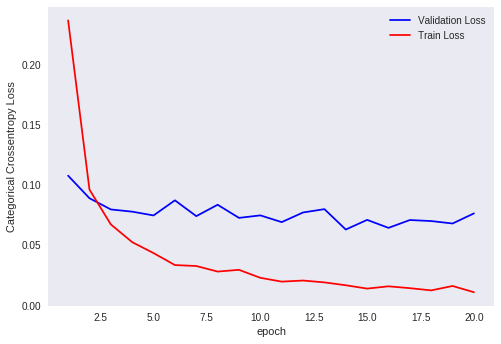

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model2= Sequential()
model2.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model2.add(Dropout(0.1))
model2.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model2.add(BatchNormalization())
model2.add(Dense(91,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model2.add(Dense(output_dim, activation='softmax'))
model2.summary()

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2_history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model2_history.history['val_loss']
ty = model2_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

###### with larger drop out rate 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 364)               285740    
_________________________________________________________________
dropout_9 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 182)               66430     
_________________________________________________________________
batch_normalization_7 (Batch (None, 182)               728       
_________________________________________________________________
dense_35 (Dense)             (None, 91)                16653     
_________________________________________________________________
dense_36 (Dense)             (None, 10)                920       
Total params: 370,471
Trainable params: 370,107
Non-trainable params: 364
_________________________________________________________________
Tr

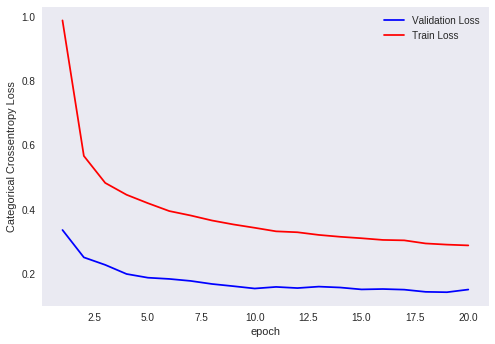

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model2= Sequential()
model2.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model2.add(Dropout(0.9))
model2.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model2.add(BatchNormalization())
model2.add(Dense(91,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model2.add(Dense(output_dim, activation='softmax'))
model2.summary()

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2_history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model2_history.history['val_loss']
ty = model2_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

###### Model2 without Drop out layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_38 (Dense)             (None, 182)               66430     
_________________________________________________________________
batch_normalization_8 (Batch (None, 182)               728       
_________________________________________________________________
dense_39 (Dense)             (None, 91)                16653     
_________________________________________________________________
dense_40 (Dense)             (None, 10)                920       
Total params: 370,471
Trainable params: 370,107
Non-trainable params: 364
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.214

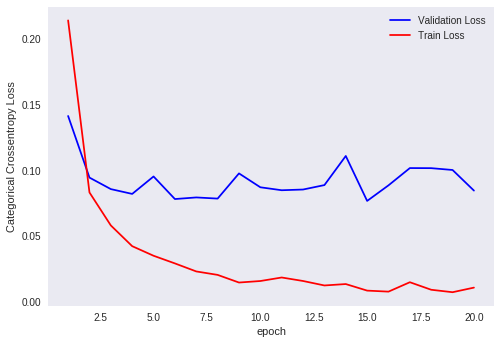

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model2= Sequential()
model2.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model2.add(Dropout(0.5))
model2.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model2.add(BatchNormalization())
model2.add(Dense(91,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model2.add(Dense(output_dim, activation='softmax'))
model2.summary()

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2_history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model2_history.history['val_loss']
ty = model2_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

###### Model2 without Batch normalization layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 364)               285740    
_________________________________________________________________
dropout_10 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 182)               66430     
_________________________________________________________________
dense_43 (Dense)             (None, 91)                16653     
_________________________________________________________________
dense_44 (Dense)             (None, 10)                920       
Total params: 369,743
Trainable params: 369,743
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.3457 

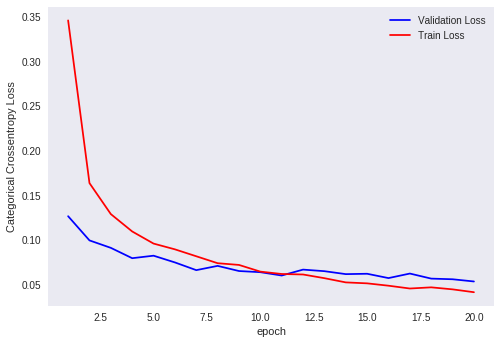

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model2= Sequential()
model2.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model2.add(Dropout(0.5))
model2.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model2.add(BatchNormalization())
model2.add(Dense(91,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model2.add(Dense(output_dim, activation='softmax'))
model2.summary()

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2_history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model2_history.history['val_loss']
ty = model2_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

###### with smaller drop out rate 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 364)               285740    
_________________________________________________________________
dropout_11 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 182)               66430     
_________________________________________________________________
dense_47 (Dense)             (None, 91)                16653     
_________________________________________________________________
dense_48 (Dense)             (None, 10)                920       
Total params: 369,743
Trainable params: 369,743
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.2482 

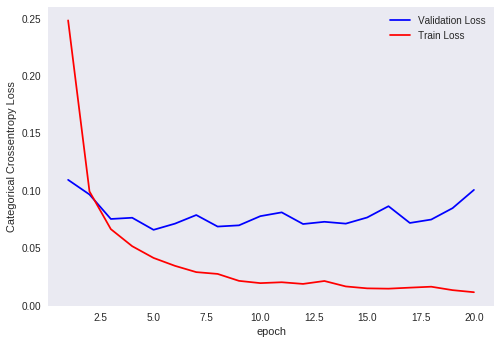

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model2= Sequential()
model2.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model2.add(Dropout(0.1))
model2.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model2.add(BatchNormalization())
model2.add(Dense(91,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model2.add(Dense(output_dim, activation='softmax'))
model2.summary()

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2_history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model2_history.history['val_loss']
ty = model2_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

###### With larger drop out rate 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 364)               285740    
_________________________________________________________________
dropout_12 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 182)               66430     
_________________________________________________________________
dense_51 (Dense)             (None, 91)                16653     
_________________________________________________________________
dense_52 (Dense)             (None, 10)                920       
Total params: 369,743
Trainable params: 369,743
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.9626 

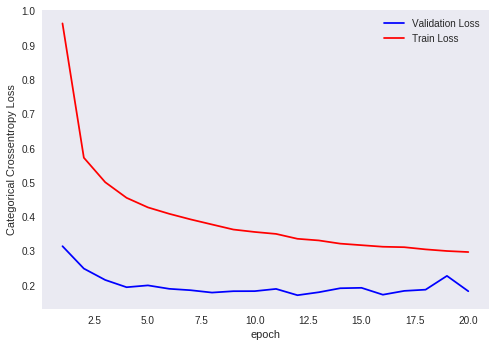

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model2= Sequential()
model2.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model2.add(Dropout(0.9))
model2.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model2.add(BatchNormalization())
model2.add(Dense(91,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model2.add(Dense(output_dim, activation='softmax'))
model2.summary()

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2_history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model2_history.history['val_loss']
ty = model2_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

###### Model2 without batch normalization and drop out layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_54 (Dense)             (None, 182)               66430     
_________________________________________________________________
dense_55 (Dense)             (None, 91)                16653     
_________________________________________________________________
dense_56 (Dense)             (None, 10)                920       
Total params: 369,743
Trainable params: 369,743
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2424 - acc: 0.9280 - val_loss: 0.1204 - val_acc: 0.9624
Epoch 2/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.

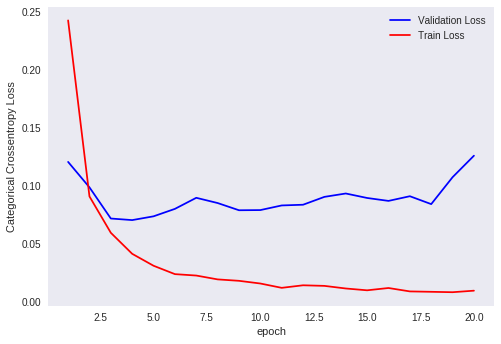

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model2= Sequential()
model2.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model2.add(Dropout(0.5))
model2.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model2.add(BatchNormalization())
model2.add(Dense(91,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model2.add(Dense(output_dim, activation='softmax'))
model2.summary()

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2_history = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model2_history.history['val_loss']
ty = model2_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

##### Model 3

###### Model3 with 2 drop out layers and a Batch normalization layer 

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model3= Sequential()
model3.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dropout(0.5))
model3.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dropout(0.5))
model3.add(Dense(91,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dense(45,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(BatchNormalization())
model3.add(Dense(25,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dense(output_dim, activation='softmax'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 364)               285740    
_________________________________________________________________
dropout_13 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 182)               66430     
_________________________________________________________________
dropout_14 (Dropout)         (None, 182)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 91)                16653     
_________________________________________________________________
dense_60 (Dense)             (None, 45)                4140      
_________________________________________________________________
batch_normalization_9 (Batch (None, 45)                180       
__________

In [0]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3_history = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.7286 - acc: 0.7709 - val_loss: 0.1895 - val_acc: 0.9418
Epoch 2/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2640 - acc: 0.9233 - val_loss: 0.1295 - val_acc: 0.9620
Epoch 3/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2043 - acc: 0.9396 - val_loss: 0.1111 - val_acc: 0.9680
Epoch 4/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1740 - acc: 0.9496 - val_loss: 0.1046 - val_acc: 0.9704
Epoch 5/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1524 - acc: 0.9552 - val_loss: 0.0934 - val_acc: 0.9729
Epoch 6/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1336 - acc: 0.9599 - val_loss: 0.0894 - val_acc: 0.9733
Epoch 7/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1230 - acc: 0.9640 - val_loss: 0.0848 - val_ac

Test score: 0.06984189698407427
Test accuracy: 0.9801


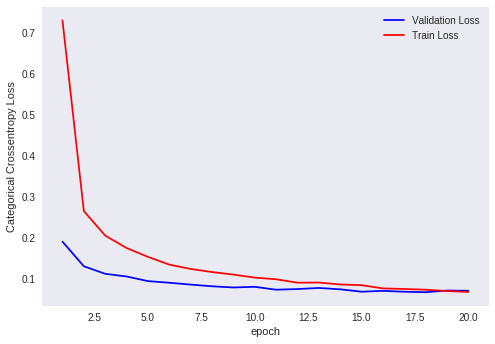

In [0]:
score = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model3_history.history['val_loss']
ty = model3_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

###### With different set of drop out rates

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 364)               285740    
_________________________________________________________________
dropout_15 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 182)               66430     
_________________________________________________________________
dropout_16 (Dropout)         (None, 182)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 91)                16653     
_________________________________________________________________
dense_66 (Dense)             (None, 45)                4140      
_________________________________________________________________
batch_normalization_10 (Batc (None, 45)                180       
__________

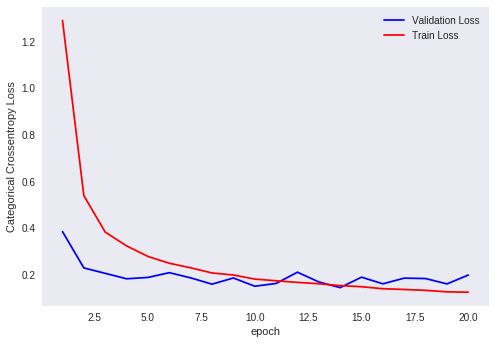

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model3= Sequential()
model3.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dropout(0.1))
model3.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dropout(0.9))
model3.add(Dense(91,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dense(45,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(BatchNormalization())
model3.add(Dense(25,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dense(output_dim, activation='softmax'))
model3.summary()

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3_history = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model3_history.history['val_loss']
ty = model3_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

###### Model 3 with one drop out and batch normalization layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 364)               285740    
_________________________________________________________________
dropout_17 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 182)               66430     
_________________________________________________________________
dense_71 (Dense)             (None, 91)                16653     
_________________________________________________________________
dense_72 (Dense)             (None, 45)                4140      
_________________________________________________________________
batch_normalization_11 (Batc (None, 45)                180       
_________________________________________________________________
dense_73 (Dense)             (None, 25)                1150      
__________

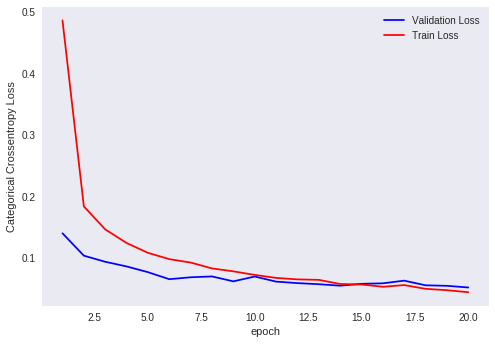

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model3= Sequential()
model3.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dropout(0.5))
model3.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model3.add(Dropout(0.5))
model3.add(Dense(91,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dense(45,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(BatchNormalization())
model3.add(Dense(25,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dense(output_dim, activation='softmax'))
model3.summary()

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3_history = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model3_history.history['val_loss']
ty = model3_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

###### Model 3 with one drop out and batch normalization layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_76 (Dense)             (None, 182)               66430     
_________________________________________________________________
dropout_18 (Dropout)         (None, 182)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 91)                16653     
_________________________________________________________________
dense_78 (Dense)             (None, 45)                4140      
_________________________________________________________________
batch_normalization_12 (Batc (None, 45)                180       
_________________________________________________________________
dense_79 (Dense)             (None, 25)                1150      
__________

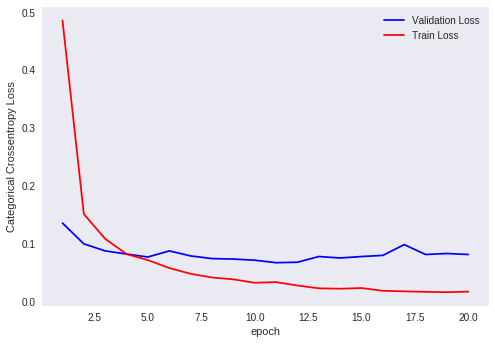

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model3= Sequential()
model3.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model3.add(Dropout(0.5))
model3.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dropout(0.5))
model3.add(Dense(91,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dense(45,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(BatchNormalization())
model3.add(Dense(25,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dense(output_dim, activation='softmax'))
model3.summary()

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3_history = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model3_history.history['val_loss']
ty = model3_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

###### Model 3 with out any drop out layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_82 (Dense)             (None, 182)               66430     
_________________________________________________________________
dense_83 (Dense)             (None, 91)                16653     
_________________________________________________________________
dense_84 (Dense)             (None, 45)                4140      
_________________________________________________________________
batch_normalization_13 (Batc (None, 45)                180       
_________________________________________________________________
dense_85 (Dense)             (None, 25)                1150      
_________________________________________________________________
dense_86 (Dense)             (None, 10)                260       
Total para

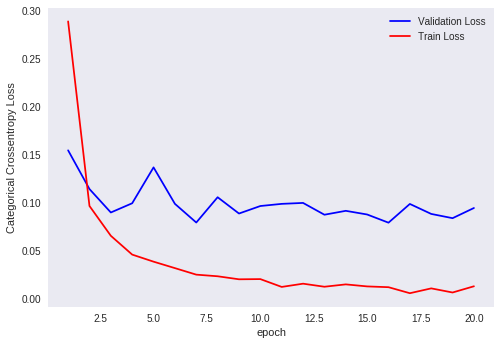

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model3= Sequential()
model3.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model3.add(Dropout(0.5))
model3.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model3.add(Dropout(0.5))
model3.add(Dense(91,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dense(45,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(BatchNormalization())
model3.add(Dense(25,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dense(output_dim, activation='softmax'))
model3.summary()

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3_history = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model3_history.history['val_loss']
ty = model3_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

###### Model 3 without batch normalization layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 364)               285740    
_________________________________________________________________
dropout_19 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 182)               66430     
_________________________________________________________________
dropout_20 (Dropout)         (None, 182)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 91)                16653     
_________________________________________________________________
dense_90 (Dense)             (None, 45)                4140      
_________________________________________________________________
dense_91 (Dense)             (None, 25)                1150      
__________

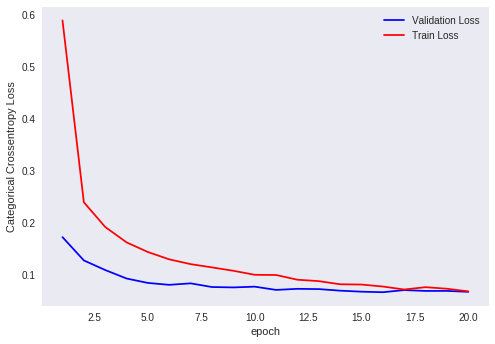

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model3= Sequential()
model3.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dropout(0.5))
model3.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dropout(0.5))
model3.add(Dense(91,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dense(45,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model3.add(BatchNormalization())
model3.add(Dense(25,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dense(output_dim, activation='softmax'))
model3.summary()

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3_history = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model3_history.history['val_loss']
ty = model3_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

###### Model 3 without drop out and batch nomalization layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_94 (Dense)             (None, 182)               66430     
_________________________________________________________________
dense_95 (Dense)             (None, 91)                16653     
_________________________________________________________________
dense_96 (Dense)             (None, 45)                4140      
_________________________________________________________________
dense_97 (Dense)             (None, 25)                1150      
_________________________________________________________________
dense_98 (Dense)             (None, 10)                260       
Total params: 374,373
Trainable params: 374,373
Non-trainable params: 0
_________________________________________________________________
Trai

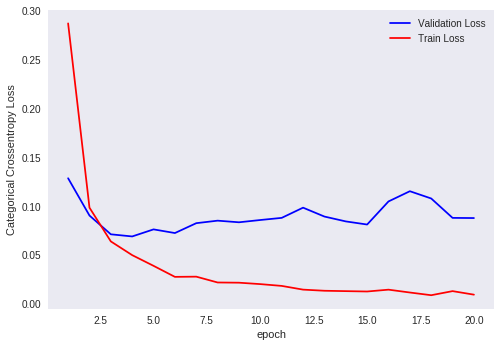

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model3= Sequential()
model3.add(Dense(364,input_dim=input_dim,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model3.add(Dropout(0.5))
model3.add(Dense(182,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model3.add(Dropout(0.5))
model3.add(Dense(91,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dense(45,activation='relu',kernel_initializer=keras.initializers.he_normal()))
#model3.add(BatchNormalization())
model3.add(Dense(25,activation='relu',kernel_initializer=keras.initializers.he_normal()))
model3.add(Dense(output_dim, activation='softmax'))
model3.summary()

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3_history = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

score = model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,nb_epoch+1))
vy = model3_history.history['val_loss']
ty = model3_history.history['loss']
plt.plot(x, vy, 'b', label="Validation Loss")
plt.plot(x, ty, 'r', label="Train Loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Categorical Crossentropy Loss')
plt.grid()

###### Conclusion 

In [3]:
from prettytable import PrettyTable
model1_table= PrettyTable()
model1_table.field_names = ["Model",'Drop out rate',"Batch normalization","Test accuracy score"]
model1_table.add_row(["Model1",0.5,"yes",0.984])
model1_table.add_row(["Model1",0.1, "yes",0.9846])
model1_table.add_row(["Model1",0.9, "yes", 0.9595])
model1_table.add_row(["Model1","without dropout","yes",0.9732])
model1_table.add_row(["Model1",0.5, "no", 0.9829])
model1_table.add_row(["Model1",0.1,"no", 0.9828])
model1_table.add_row(["Model1",0.9,"no", 0.9507])
model1_table.add_row(["Model1","without dropout","no",0.9824])
print(model1_table)

+--------+-----------------+---------------------+---------------------+
| Model  |  Drop out rate  | Batch normalization | Test accuracy score |
+--------+-----------------+---------------------+---------------------+
| Model1 |       0.5       |         yes         |        0.984        |
| Model1 |       0.1       |         yes         |        0.9846       |
| Model1 |       0.9       |         yes         |        0.9595       |
| Model1 | without dropout |         yes         |        0.9732       |
| Model1 |       0.5       |          no         |        0.9829       |
| Model1 |       0.1       |          no         |        0.9828       |
| Model1 |       0.9       |          no         |        0.9507       |
| Model1 | without dropout |          no         |        0.9824       |
+--------+-----------------+---------------------+---------------------+


In [4]:
from prettytable import PrettyTable
model1_table= PrettyTable()
model1_table.field_names = ["Model",'Drop out rate',"Batch normalization","Test accuracy score"]
model1_table.add_row(["Model2",0.5,"yes",0.9834])
model1_table.add_row(["Model2",0.1, "yes",0.9816])
model1_table.add_row(["Model2",0.9, "yes", 0.9598])
model1_table.add_row(["Model2","without dropout","yes",0.9812])
model1_table.add_row(["Model2",0.5, "no", 0.9852])
model1_table.add_row(["Model2",0.1,"no", 0.9798])
model1_table.add_row(["Model2",0.9,"no", 0.9577])
model1_table.add_row(["Model2","without dropout","no",0.9747])
print(model1_table)

+--------+-----------------+---------------------+---------------------+
| Model  |  Drop out rate  | Batch normalization | Test accuracy score |
+--------+-----------------+---------------------+---------------------+
| Model2 |       0.5       |         yes         |        0.9834       |
| Model2 |       0.1       |         yes         |        0.9816       |
| Model2 |       0.9       |         yes         |        0.9598       |
| Model2 | without dropout |         yes         |        0.9812       |
| Model2 |       0.5       |          no         |        0.9852       |
| Model2 |       0.1       |          no         |        0.9798       |
| Model2 |       0.9       |          no         |        0.9577       |
| Model2 | without dropout |          no         |        0.9747       |
+--------+-----------------+---------------------+---------------------+


In [6]:
from prettytable import PrettyTable
model1_table= PrettyTable()
model1_table.field_names = ["Model",'Drop out rate',"Batch normalization","Test accuracy score"]
model1_table.add_row(["Model3",(0.5,0.5),"yes",0.9801])
model1_table.add_row(["Model3",(0.1,0.9),"yes",0.9415])
model1_table.add_row(["Model3",(0.5,0.0),"yes",0.9851])
model1_table.add_row(["Model3",(0.0,0.5),"yes",0.9821])
model1_table.add_row(["Model3","without dropout","yes", 0.9783])
model1_table.add_row(["Model3",(0.5,0.5),"no",0.9804])
model1_table.add_row(["Model3","without dropout","no", 0.9802])
print(model1_table)

+--------+-----------------+---------------------+---------------------+
| Model  |  Drop out rate  | Batch normalization | Test accuracy score |
+--------+-----------------+---------------------+---------------------+
| Model3 |    (0.5, 0.5)   |         yes         |        0.9801       |
| Model3 |    (0.1, 0.9)   |         yes         |        0.9415       |
| Model3 |    (0.5, 0.0)   |         yes         |        0.9851       |
| Model3 |    (0.0, 0.5)   |         yes         |        0.9821       |
| Model3 | without dropout |         yes         |        0.9783       |
| Model3 |    (0.5, 0.5)   |          no         |        0.9804       |
| Model3 | without dropout |          no         |        0.9802       |
+--------+-----------------+---------------------+---------------------+


###### Observations

It can be observed form the above tables that with drop out rate 0.5 with out batch normalization the model2 produces the best results at the end of 20 epochs and also doesnt over fit at the end of 20 epochs

From the error plots it can be understood that with small drop out rates(also when not using and dropout layer) the models can overfit and with large drop out rates models might converge slower.

Batch NOrmalization is providing a slight boost in the test accuracy score